# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- The (%) noted above are out of 100; this will be scaled down to **maximum of 60 marks** for the assessment **(or maximum of 50 marks for CMP9772M)** .
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** and code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [1]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [2]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the physical and chemical properties of the Li-ion battery, which can be classified on the basis of their crystal system [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries), shared in the public domain by Divyansh Agrawal).

Each sample corresponds to the properties of a battery, and consists of following features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Formation Energy`       | `float`: eV | Formation energy of the material. |
| `E Above Hull` | `float`: eV | Energy of decomposition of material into most stable ones. |
| `Band Gap` | `float`: eV | Band gap. |
| `Nsites` | `int`: count | Number of atoms in the unit cell of the crystal. |
| `Density` | `float`: gm/cc | The density of bulk crystalline materials. |
| `Volume` | `float` | The unit cell volume of the material. |

The goal for the assessment is to predict whether the crystal system of the battery is _monoclinic_, _orthorhombic_ or _triclinic_, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Crystal System`  | `string`: class designation | Class of the crystal system. |


## Loading the dataset

The dataset is given in _batteries.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Crystal System'` field of the _.csv_ file.
- _Note_: The class in the `'Crystal System'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

Formation Energy    0
E Above Hull        0
Band Gap            0
Nsites              0
Density             0
Volume              0
dtype: int64


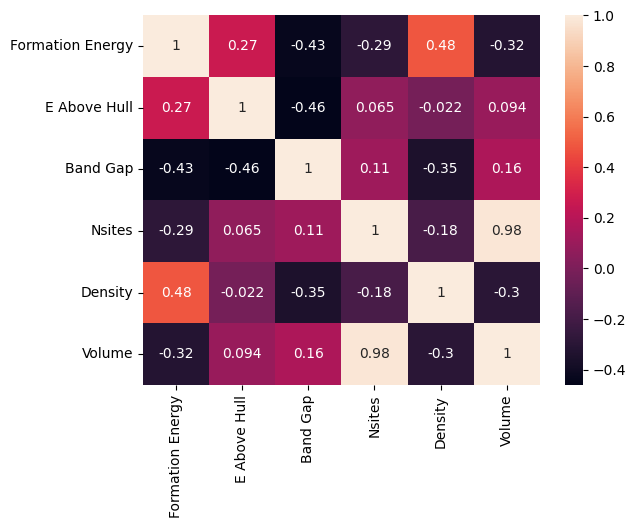

In [2]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns

#load dataset into pandas dataframe and drop NaN values
df = pd.read_csv("batteries.csv").dropna()

#map categorical labels to integers
crystal_system_mapping={'monoclinic':0,'orthorhombic':1,'triclinic':2}
df['Crystal System']=df['Crystal System'].replace(crystal_system_mapping)


#create 1D array containing all ground truth values
y = np.array(df['Crystal System'].values.tolist())

df.drop('Crystal System',axis=1,inplace=True)
#create 2D array containing all samples and their features
X = np.array(df.values.tolist())

#display heatmap of correlation values
sns.heatmap(df.corr(),annot=True)
print(df.isnull().sum())


**TESTING CELL**

In [14]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

Sample Size: **339** (including 5 rows containing NaN)

Classes (3): **monoclinic, orthorhombic, triclinic**

Features: **Formation Energy, E Above Hull, Band Gap, Nsites, Density, Volume**

Correlations:
- **Very Strong positive correlation between 'Volume' and 'Nsites' (0.98)**
- Weak negative correlation between 'Band Gap' and 'Formation Energy'
- Weak negative correlation between 'Band Gap' and 'E Above Hull'
- Weak positive correlation between 'Density' and 'Formation Energy'
- Weak negative correlation between 'Density' and 'E Above Hull'
- Weak negative correlation between 'Volume' and 'Formation Energy'

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_test`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [3]:
#Imports
from sklearn.model_selection import train_test_split

#Create training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**TESTING CELL**

In [270]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [4]:
#Imports
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Generates an accuracy score for the model
def model_accuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

#Create K Nearest Neighbour model
model = KNeighborsClassifier(n_neighbors=3)

#Fit the training data to the model
model.fit(X_train, y_train)

#Generate predictions from test data
y_predictions = model.predict(X_test)

**TESTING CELL**

In [272]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_predictions))

[0]
0.6268656716417911


**ANSWER CELL**

When addressing the ratio of the train/test split we must ensure that the variance in our parameter estimates (training) and performance statistic (testing) are managed equally. Generally speaking, an 80/20 split is the most widely used starting point,  but this could be increased, for example to 90/10, if the sample size is high and the algorithm is very intensive. **For this model, an 80/20 split was chosen**.

The classification technique used by the model is **K Nearest Neighbours (KNN)** which is advantaged by its **simplicity** and thus ease to implement. One of the only algorithms that would be even simpler is linear regression but this would only be suitable for datasets with two classes, ours has three. [3]

There is **no proper training phase for KNN** as it works on a per instance basis so 'training time' is essentially insignificant. However, this results in the **query time being longer for KNN than other techniques** such as Decision Trees and the desparity, in this respect, only grows with the size of the dataset. As ours is relatively small, KNN is adequate. [3]

Classification of data depends more on some attributes than others [4] and KNN is especially **succeptible to being fooled by less important attributes** [3] when compared to decision trees, leading to misclassification. To mitigate this, we can apply weights to data or remove redundant (highly correlated) features entirely.

As for the evaluation metric itself, **accuracy score** is the quickest and easiest to check with just a single line of code. It evaluates, in absolute terms, the ratio of correct predicitons to incorrect ones. The main disadvantage of accuracy is that it masks class imbalance [7] by giving equal weight to the model's ability to predict all categories, which can result in disguised low performance. For imbalanced datasets, **precision** and **recall** will be more representitive of the true performance of the model. They are more important when the cost of false negatives is high.

The accuracy score of the model was **56%** with the first test/training split used. This is below the generally accepted standard for an accurate model at 70-90% [5] [6], but is **adequate** given the simplicity of the approach. By varying the K-value, we may be able to improve the model's accuracy further.

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- Implement a function `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision). You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [5]:
#Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from numpy import mean
from numpy import std

#Evaluates the effectiveness of the model
def evaluate_model(model, X, y):
    print('Evaluating model...')
    
    #Split the data and fit to the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)

    #Generate predictions from model with test data
    y_pred = model.predict(X_test)

    #Generate classification report
    target_names = ['monoclinic', 'orthorhombic', 'triclinic']
    print(classification_report(y_test, y_pred, target_names=target_names))

    #10-Fold Cross Validation
    #This code is a modified and extended version of https://machinelearningmastery.com/k-fold-cross-validation/ [9]
    cv = KFold(n_splits = 10, random_state=1, shuffle=True)    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))



**TESTING CELL**

In [274]:
evaluate_model(model, X, y)

Evaluating model...
              precision    recall  f1-score   support

  monoclinic       0.43      0.60      0.50        25
orthorhombic       0.45      0.37      0.41        27
   triclinic       0.70      0.47      0.56        15

    accuracy                           0.48        67
   macro avg       0.53      0.48      0.49        67
weighted avg       0.50      0.48      0.48        67

Cross Validation Accuracy: 0.589 (0.107)


**ANSWER CELL**

By making use of the **classification report** from sklearn.metrics, we can easily display a number of metrics by which to determine the effectiveness of the model. The following is a breakdown of the report from [8]:
- **Precision**: Given per class and for the overall model, precision refers to the percentage of correct predictions relative to the total positive predictions.
- **Recall**: Given per class and for the overall model, recall refers to the percentage of correct positive predictions relative to total actual positives.
- **F1 Score**: A weighted harmonic mean of precision and recall. 

Within the report we also get the corresponding averages for each metric amongst all classes and the same **accuracy** of the model overall that we saw in the previous answer. The classification report also reports 'support' values which are representitive of the number of data points that were assigned to each class as a reference. 

In addition to the classification report, I have made use of **10-Fold Cross-Validation** and taken the mean average across all folds to find a more correct accuracy score and provided the standard deviation. This method shuffles the dataset and splits it into 10 groups. For each unique group [9]:
- Take the group as a hold out or test data set
- Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model

K-Fold Cross-Validation method provides a **stable accuracy** and prevents **overfitting** of the training data [10].

By combining all of the metrics above, we can gain a clearer picture of the effectiveness of the model, regardless of how imbalanced the dataset may be. 

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [ ]:
#Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

#KNN Model
model_1 = KNeighborsClassifier(n_neighbors=3)

#Random Forest Model
model_2 = DecisionTreeClassifier(max_depth=11, random_state=1)

#Gaussian Naive Bayes Model
model_3 = GaussianNB()

# \\ The following code is meant for testing purposes //

#Create empty lists to store test models for KNN and Decision Tree Classifiers
knn_list = []
dtc_list = []

#Populate with their respective parameters ranging from 1 to 20
for i in range(1,21):
    knn_list.append([i,KNeighborsClassifier(n_neighbors=i)])
    dtc_list.append([i,DecisionTreeClassifier(max_depth=i, random_state=1)])

#This code is a modified and extended version of https://machinelearningmastery.com/bagging-ensemble-with-python/ [13]
#Run 10-Fold Cross-Validation for KNN models and display evaluations
print('KNN K vals')
for knn in knn_list:
    cv = KFold(n_splits = 10, random_state=1, shuffle=True)   
    score = cross_val_score(knn[1], X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('>%s %.3f (%.3f)' % (knn[0], mean(score), std(score)))
#Run 10-Fold Cross-Validation for DTC models and display evaluations
print('DCT max_depth vals')
for dtc in dtc_list:
    cv = KFold(n_splits = 10, random_state=1, shuffle=True)   
    score = cross_val_score(dtc[1], X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('>%s %.3f (%.3f)' % (dtc[0], mean(score), std(score)))

**TESTING CELL**

In [40]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)

Evaluating model...
              precision    recall  f1-score   support

  monoclinic       0.56      0.58      0.57        33
orthorhombic       0.54      0.48      0.51        27
   triclinic       0.33      0.43      0.38         7

    accuracy                           0.52        67
   macro avg       0.48      0.50      0.48        67
weighted avg       0.53      0.52      0.52        67



Cross Validation Accuracy: 0.589 (0.107)

Evaluating model...
              precision    recall  f1-score   support

  monoclinic       0.62      0.56      0.59        32
orthorhombic       0.62      0.67      0.64        24
   triclinic       0.42      0.45      0.43        11

    accuracy                           0.58        67
   macro avg       0.55      0.56      0.55        67
weighted avg       0.59      0.58      0.58        67

Cross Validation Accuracy: 0.596 (0.103)

Evaluating model...
              precision    recall  f1-score   support

  monoclinic       0.52      0.65      0.58        23
orthorhombic       0.78      0.47      0.58        30
   triclinic       0.35      0.50      0.41        14

    accuracy                           0.54        67
   macro avg       0.55      0.54      0.52        67
weighted avg       0.60      0.54      0.55        67

Cross Validation Accuracy: 0.431 (0.102)


**ANSWER CELL**

**Model Selection and Adjustment**

For model_1, I stuck with KNN as it proved to be relatively effective in the previous tasks.

The two other models selected for comparison were the **Decision Tree** and **Gaussian Naive Bayes** algorithms.

Decision Tree is a machine learning algorithm that generates a 'tree' which is essentially a sequence of if/else statements which runs as deep as the max_depth parameter will allow, growing more specific the further down the tree we go. The number of statements needs to be limited, otherwise the algorithm will overfit the data by learning the dataset entirely, creating a 'leaf' node for each and every datapoint. 

Gaussian Naive Bayes algorithm is a probablistic classifier dependant on applying Bayes Theorem. The training data are split by class and the mean and standard deviation of every class is calculated [11]. Therefore for estimating the probabilities of continuous data set the following equation can be utilized [12]:

\begin{equation*}
\mathrm{P}(\mathrm{X}=\mathrm{x}\vert \mathrm{C}=\mathrm{c})=\frac{1}{\sqrt{2\pi\sigma}}e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}} \tag{1} 
\end{equation*}

The major advantage of NB is that it requires little measure of training data which are vital for characterization and necessary for classification [11].

**Parameter Adjustment**

Model_1 and model_2 have adjustable parameters k and max_depth, respectively. To determine the best value for each, two testing loops were utilised with parameters ranging from 1 to 20, as shown in the solution cell below the actual model definitions. For the Decision Tree Classifier, random_state = 1 was selected for reproducability. The results clearly show that the most optimal parameters are k = 3 and max_depth = 11 and, as such, those parameters were then implemented into the actual models above.

The parameter variants were compared by using 10-Fold Cross-Validation accuracy scores as this is the best summative metric for purpose. The accompanying standard deviations are displayed in parenthesis.

**Model Comparison**

For the comparison of the models, the classification report is critical for getting a more detailed analysis than just accuracy alone. For this comparison, I will be using the f1 scores from the report that I got when testing the models for the first time as follows:

\begin{align}
&&F1\hspace{0.1cm}Scores\\
&model        &  1    &\hspace{1.4cm}2    &\hspace{0.5cm}3\\
&monoclinic   &  0.59 &\hspace{1cm}0.43 &\hspace{0.5cm}0.42\\
&orthorhombic &  0.55 &\hspace{1cm}0.66 &\hspace{0.5cm}0.34\\
&triclinic    &  0.38 &\hspace{1cm}0.62 &\hspace{0.5cm}0.30\\
&average      &  0.50 &\hspace{1cm}0.57 &\hspace{0.5cm}0.35\\
\end{align}

Some interesting observations can be drawn from this data. The best performing model was model_2 followed by model_1, both of which are far better than model 3, on average. However, model_2 seems to underperform when classifying for monoclinic type crystal structures. Despite this, the overall average score cannot be ignored. Additionally, the cross validation accuracy for model_2 was the highest with the lowest standard deviation. All of this evidence points towards model_2, Decision Tree with max_depth 11, as being the best suited model for our dataset.

For future work, more algorithms could be tested and compared to the ones above such as Linear Support Vector classification. 

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [38]:
from sklearn.ensemble import BaggingClassifier

bagged_1 = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), random_state=1)
bagged_2 = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=11), random_state=1)
bagged_3 = BaggingClassifier(estimator=GaussianNB(), random_state=1)

**TESTING CELL**

In [41]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

Evaluating model...
              precision    recall  f1-score   support

  monoclinic       0.68      0.66      0.67        29
orthorhombic       0.59      0.76      0.67        21
   triclinic       0.67      0.47      0.55        17

    accuracy                           0.64        67
   macro avg       0.65      0.63      0.63        67
weighted avg       0.65      0.64      0.64        67

Cross Validation Accuracy: 0.556 (0.091)

Evaluating model...
              precision    recall  f1-score   support

  monoclinic       0.65      0.69      0.67        29
orthorhombic       0.62      0.65      0.64        23
   triclinic       0.42      0.33      0.37        15

    accuracy                           0.60        67
   macro avg       0.56      0.56      0.56        67
weighted avg       0.59      0.60      0.59        67

Cross Validation Accuracy: 0.602 (0.074)

Evaluating model...
              precision    recall  f1-score   support

  monoclinic       0.27      0.53      

**ANSWER CELL**

_Write your answer here._

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

In [14]:
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######

**ANSWER CELL**

Finally we achieve an accuracy score of 63\% which is much improved over the majority-class classifier at 41\%. The MCC and Kappa metrics confirm that we have now constructed a much better classifier, with scores of around 0.43. The confusion matrix however still shows that the minority class is underfperforming with respect to the other two.:
- Class 0 is performing the best, however is much more often misclassified as class 1 (35) than as class 2 (14).
- Class 1 is performing second best, and is equally more as likely to be misclassified as class 0.
- Class 2 is performing the worst, as it is the minority class. It is quite often confused with class 0.

## References

[1] Divyansh Agrawal: Crystal System Properties for Li-ion batteries (dataset) https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries/discussion (accessed 28/08/2023)

[2] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[3] www.mathworks.com. (n.d.). Choosing the Best Machine Learning Classification Model and Avoiding Overfitting. [online] Available at: https://www.mathworks.com/campaigns/offers/next/choosing-the-best-machine-learning-classification-model-and-avoiding-overfitting.html [Accessed 18 Nov. 2023].

[4] Syed, M. (2014). Attribute weighting in k-nearest neighbor classification. [online] Semantic Scholar. Available at: https://www.semanticscholar.org/paper/Attribute-weighting-in-k-nearest-neighbor-Syed/3e82eb773c42bdea98ae2d3add112510593f1528 [Accessed 18 Nov. 2023].

[5] Barkved, K. (2022). How To Know if Your Machine Learning Model Has Good Performance | Obviously AI. [online] www.obviously.ai. Available at: https://www.obviously.ai/post/machine-learning-model-performance [Accessed 18 Nov. 2023].

[6] Deepchecks. (n.d.). What is a good accuracy score in Machine Learning? [online] Available at: https://deepchecks.com/question/what-is-a-good-accuracy-score-in-machine-learning/ [Accessed 18 Nov. 2023].

[7] www.evidentlyai.com. (n.d.). Accuracy vs. precision vs. recall in machine learning: what’s the difference? [online] Available at: https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall [Accessed 18 Nov. 2023]. 

[8] Zach (2022). How to Interpret the Classification Report in sklearn (With Example). [online] Statology. Available at: https://www.statology.org/sklearn-classification-report/ [Accessed 18 Nov. 2023].

[9] Brownlee, J. (2018). A Gentle Introduction to k-fold Cross-Validation. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/k-fold-cross-validation/ [Accessed 18 Nov. 2023].

[10] Shiksha Online (2022). K-fold Cross-validation - Shiksha Online. [online] Shiksha.com. Available at: https://www.shiksha.com/online-courses/articles/k-fold-cross-validation/ [Accessed 18 Nov. 2023].

[11] Kamel, H., Abdulah, D. and Al-Tuwaijari, J.M. (2019). Cancer Classification Using Gaussian Naive Bayes Algorithm. 2019 International Engineering Conference (IEC). doi:https://doi.org/10.1109/iec47844.2019.8950650.

[12] B. M. Gayathri and C. P. Sumathi. (2016). An Automated Technique using Gaussian Naive Bayes Classifier to Classify Breast Cancer, s.l: International Journal of Computer Applications, vol. 148, no. 6.

[13] Brownlee, J. (2020). How to Develop a Bagging Ensemble with Python. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/bagging-ensemble-with-python/ [Accessed 21 Nov. 2023].